# Test operations in higher dimensions

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
from geometry import *

## Set-up 2D hyperboloid manifold


In [46]:
alpha = np.linspace(-1., 1., 100)
theta = np.linspace(-np.pi, np.pi, 100)

alpha_mesh, theta_mesh = np.meshgrid(alpha, theta)

x0 = np.sinh(alpha_mesh)*np.cos(theta_mesh)
x1 = np.sinh(alpha_mesh)*np.sin(theta_mesh)
x2 = np.cosh(alpha_mesh)
print("Ranges: {:.3g} < x0 < {:.3g}, {:.3g} < x1 < {:.3g}, {:.3g} < x2 < {:.3g}".format(
            np.min(x0), np.max(x0),np.min(x1), np.max(x1),np.min(x2), np.max(x2),
        )
     )

Ranges: -1.18 < x0 < 1.18, -1.18 < x1 < 1.18, 1 < x2 < 1.54


# Try to plot

In [47]:
#fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111, projection="3d")
#ax.scatter(x0, x1, x2)

In [48]:
#fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111, projection="3d")
#ax.plot_trisurf(X=x0, Y=x1, Z=x2)
#This doesn't seem to work like this!

Hmmmmm, not what I expected... Perhaps a mesh grid is needed.

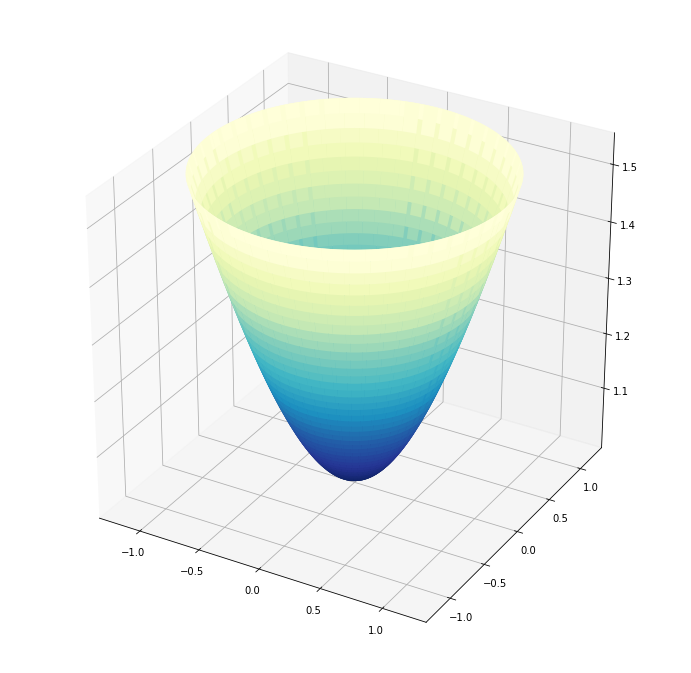

In [49]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x0, x1, x2, cmap=plt.cm.YlGnBu_r)

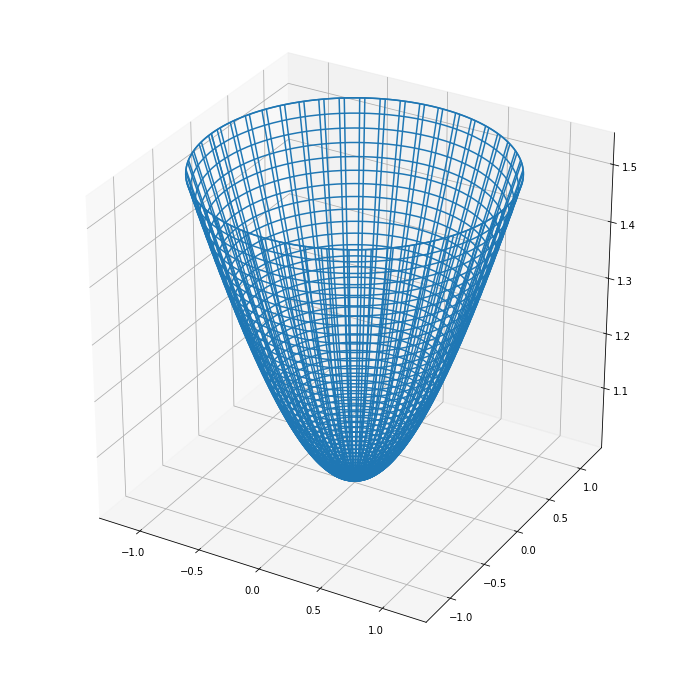

In [50]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(x0, x1, x2)

In [51]:
def gradient_descent(pt_i, target, differential_fn, geometry="hyperbolic", learning_rate=1.):
    '''
        Calculate local gradient of differential, given the current pt and the target.
        Inputs:
                Two (d+1)-dimensional vectors in ambient space co-ordinates, pt_i and target
                pt_i: (d+1)-dimensional vector in ambient space co-ordinates,
                       the point to evaluate the gradient at.
                target: (d+1)-dimensional vectors in ambient space co-ordinates, the target point
                differential_fn: function that calculates the derivative
                learning_rate: dictates how far to step in gradient direction
    '''
    # Calculate gradient in ambient space co-ordinates
    step = differential_fn(pt_i, target, geometry)
    print("step =",step)
    # Project this gradient onto tangent space
    projection = project_to_tangent(pt_i, step, geometry)
    print("projection on tangent space = ",projection)
    # Map to manifold and return this updated pt
    return exponential_map(-learning_rate*projection, pt_i, geometry)
#    return exponential_map(-projection, pt_i, geometry)

In [52]:
def error_differential_eucl(u, v, geometry="hyperbolic"):
    '''
        Calculate differential of distance between points u and v, **with respect to u**,
        accounting for different geometries by implementing an appropriate metric.
        Inputs:
            u: (d+1)-dimensional vector, expressed in ambient space coordinates
            v: (d+1)-dimensional vector, expressed in ambient space coordinates
            geometry: specifies which metric to use (and hence how inner product calculated)
        Outputs:
            gradient of the distance in (d+1)-dimensional ambient space coordinates
    '''   
    if np.array_equal(u,v):
        return np.zeros(u.shape)
    # If u and v are different, calculate the gradient
    metric = get_metric(u.shape[0], geometry)
    print("u = {}, v = {}, u.v = {}".format(u, v, dot(u, v, geometry)))
    if geometry == "spherical":
        coeff = -1./np.sqrt(1.-dot(u, v, geometry)**2)
    if geometry == "hyperbolic":        
        coeff = -1./np.sqrt(dot(u, v, geometry)**2-1.) 
    #return coeff*metric.dot(v)
    return coeff*v

In [53]:
target = np.array([0., 0., 1.])
initial_point = np.array([np.sinh(0.9)*np.cos(0.3), np.sinh(0.9)*np.sin(0.3), np.cosh(0.9)])

In [54]:
updated_pts = [initial_point]
for i in range(1,10):
    updated_pts.append(
        gradient_descent( 
                         updated_pts[i-1], 
                         target,
                         error_differential_eucl, 
                         geometry="hyperbolic", 
                         learning_rate=0.1
                        )
    )
    print("updated_pt = ", updated_pts[i])
    print("-"*80)
print(updated_pts)

u = [0.98066888 0.30335643 1.43308639], v = [0. 0. 1.], u.v = -1.4330863854487743
step = [-0.         -0.         -0.97416825]
project_to_tangent: point_on_manifold = [0.98066888 0.30335643 1.43308639], displacement = [-0.         -0.         -0.97416825], geometry = hyperbolic
project_to_tangent: xp_norm = 1.3960672530300118, xx_norm = -1.0
projection on tangent space =  [1.36907972 0.42350598 1.02651673]
exponential_map: norm_v_tan =  0.09999999999999999
updated_pt =  [0.84844005 0.26245326 1.33743495]
--------------------------------------------------------------------------------
u = [0.84844005 0.26245326 1.33743495], v = [0. 0. 1.], u.v = -1.3374349463048445
step = [-0.         -0.         -1.12599174]
project_to_tangent: point_on_manifold = [0.84844005 0.26245326 1.33743495], displacement = [-0.         -0.         -1.12599174], geometry = hyperbolic
project_to_tangent: xp_norm = 1.5059407020437068, xx_norm = -1.0
projection on tangent space =  [1.27770041 0.39523905 0.88810598]

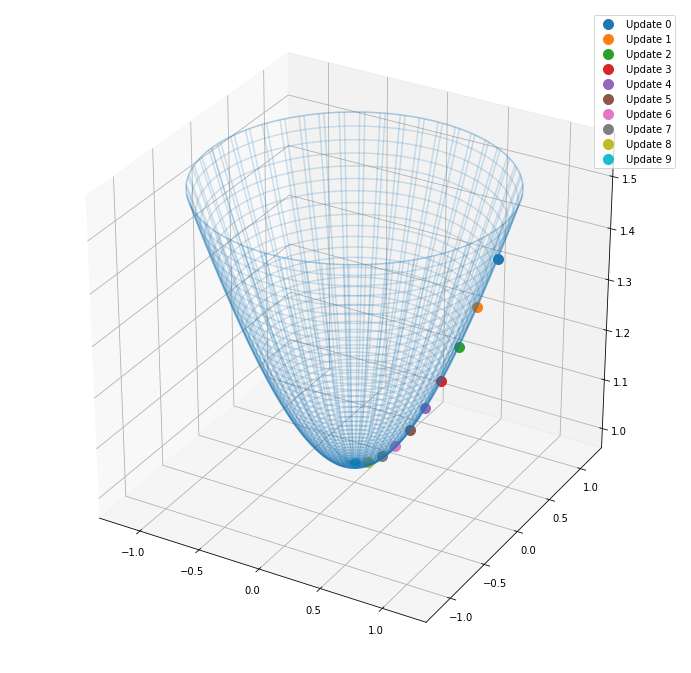

In [57]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")#, xlim=[-1., 1.], ylim=[-1., 1.], zlim=[0.8, 2.])
ax.plot_wireframe(x0, x1, x2, alpha=0.2)
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], pt[2], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
ax.legend()

# Plot 2D contour

## Sphere test

Ranges: -1 < x < 1, -1 < y < 1, -1 < z < 1


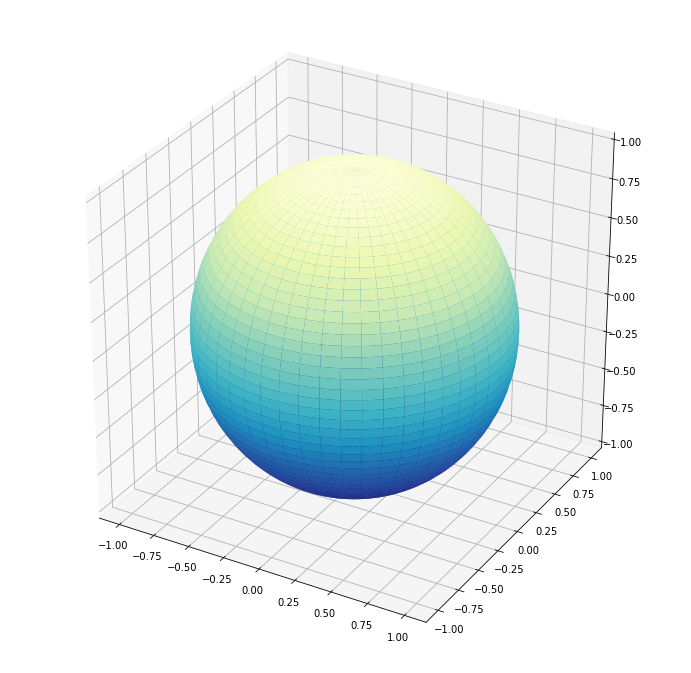

In [10]:
phi = np.linspace(-np.pi, np.pi, 1000)
theta = np.linspace(-0.5*np.pi, 0.5*np.pi, 1000)

phi_mesh, theta_mesh = np.meshgrid(phi, theta)

X = np.cos(phi_mesh)*np.cos(theta_mesh)
Y = np.sin(phi_mesh)*np.cos(theta_mesh)
Z = np.sin(theta_mesh)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

print("Ranges: {:.3g} < x < {:.3g}, {:.3g} < y < {:.3g}, {:.3g} < z < {:.3g}".format(
            np.min(X), np.max(X), np.min(Y), np.max(Y), np.min(Z), np.max(Z),
        )
     )

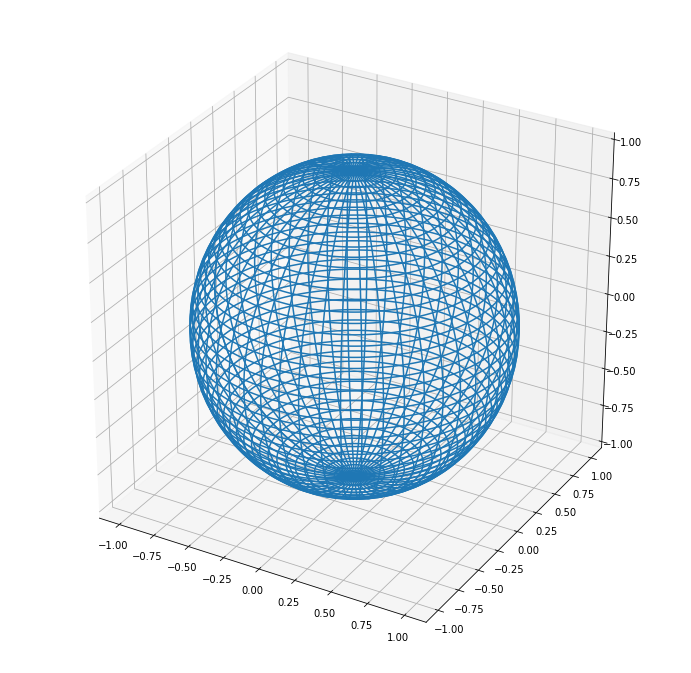

In [11]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X, Y, Z, cmap=plt.cm.YlGnBu_r)



In [37]:
target2 = np.array([1., 0., 0.])
initial_theta = 0.75*np.pi
initial_phi = 0.666*np.pi
initial_pt2 = np.array([
                        np.cos(initial_theta)*np.cos(initial_phi),
                        np.cos(initial_theta)*np.sin(initial_phi), 
                        np.sin(initial_theta)
                    ])
updated_pts = [initial_pt2]
for i in range(1,12):
    updated_pts.append(
        gradient_descent(updated_pts[i-1], 
                         target2, 
                         error_differential_eucl, 
                         geometry="spherical", 
                         learning_rate=.1
                        )
    )

u = [ 0.35227007 -0.61311157  0.70710678], v = [1. 0. 0.], u.v = 0.3522700662716884
step = [-1.06849206 -0.         -0.        ]
project_to_tangent: point_on_manifold = [ 0.35227007 -0.61311157  0.70710678], displacement = [-1.06849206 -0.         -0.        ], geometry = spherical
project_to_tangent: xp_norm = -0.37639776842276434, xx_norm = 1.0
projection on tangent space =  [-0.93589839 -0.23077383  0.26615341]
exponential_map: norm_v_tan =  0.1
u = [ 0.44394412 -0.58700963  0.67700319], v = [1. 0. 0.], u.v = 0.44394411736463607
step = [-1.11600358 -0.         -0.        ]
project_to_tangent: point_on_manifold = [ 0.44394412 -0.58700963  0.67700319], displacement = [-1.11600358 -0.         -0.        ], geometry = spherical
project_to_tangent: xp_norm = -0.49544322378630035, xx_norm = 0.9999999999999998
projection on tangent space =  [-0.89605447 -0.29082994  0.33541664]
exponential_map: norm_v_tan =  0.1
u = [ 0.53118243 -0.55504248  0.6401352 ], v = [1. 0. 0.], u.v = 0.53118242558

[1. 0. 0.]
[ 0.35227007 -0.61311157  0.70710678] ---> [ 0.99386787 -0.0724377   0.08354301]


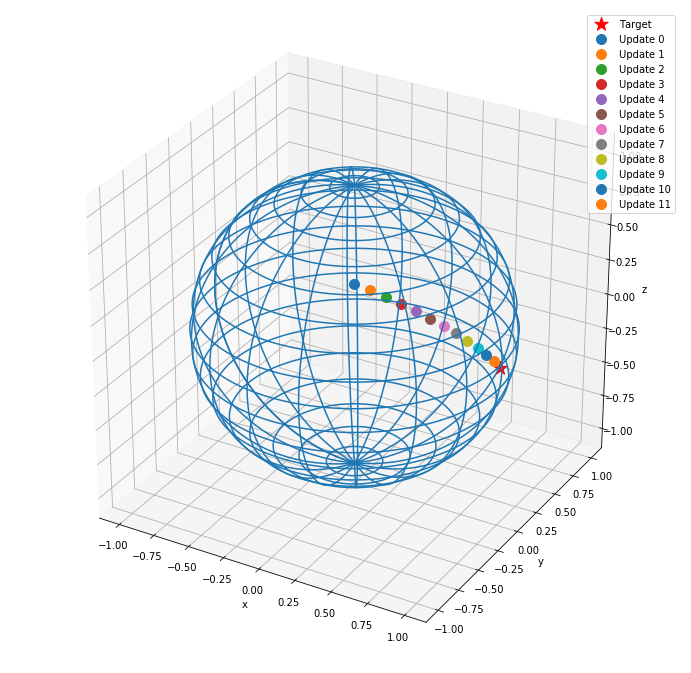

In [38]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X, Y, Z, rcount=18, ccount=18,)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(target2[0], target2[1], target2[2], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], pt[2], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
ax.legend()
print(target2)
print(updated_pts[0],"--->",updated_pts[-1])

[1. 0. 0.]
[ 0.35227007 -0.61311157  0.70710678] ---> [ 0.99386787 -0.0724377   0.08354301]


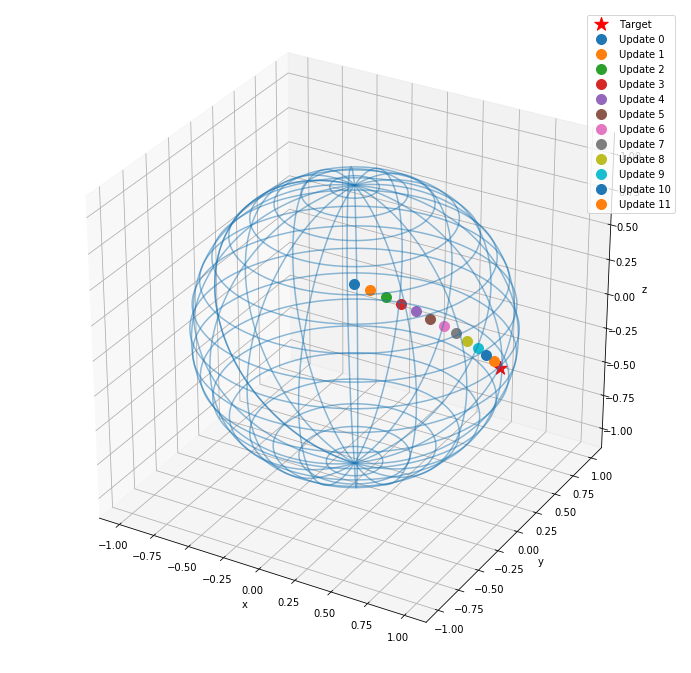

In [39]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X, Y, Z, rcount=18, ccount=18,alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(target2[0], target2[1], target2[2], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], pt[2], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
ax.legend()
print(target2)
print(updated_pts[0],"--->",updated_pts[-1])